# Astrocyte/Radial Glia

In [1]:
# ! pip install scanpy
# ! pip install scProject -U
import scProject
import scanpy as sc
patterns = sc.read_h5ad('patterns_anndata.h5ad')
dataset = sc.read_h5ad('test_target.h5ad')
dataset_filtered, patterns_filtered = scProject.matcher.filterAnnDatas(dataset, patterns, 'gene_id')

(55371, 428) dataset filter shape
(80, 428) patterns filter shape


Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.


Perfrom a regression with .001 weight of regularization and 1% lasso to encourage as many features to show and then we can weed them out by increasing the amount of lasso and regularization

(55371, 80)
[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


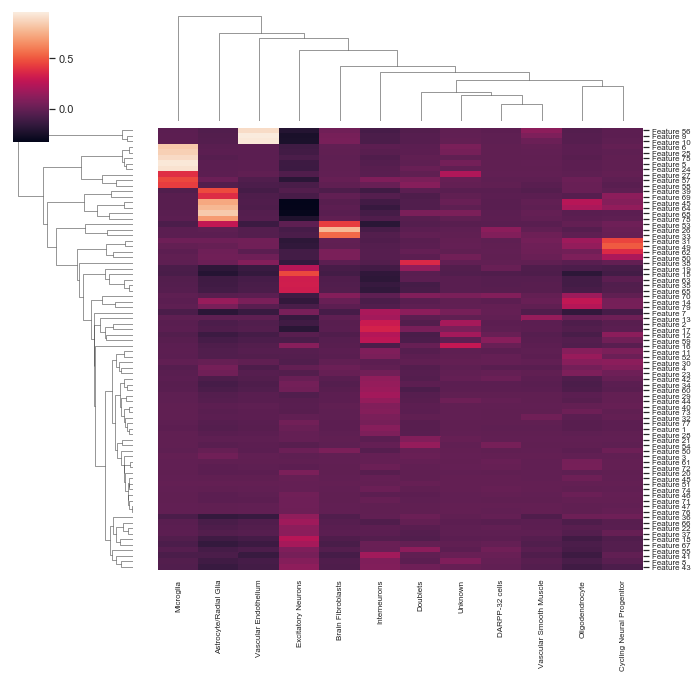

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= [10, 12]
scProject.rg.NNLR_ElasticNet(dataset_filtered, patterns_filtered, 'ARG01', .001, .01)
scProject.viz.pearsonMatrix(dataset_filtered, patterns_filtered, 'CellType', 12, 'ARG01', 'PearsARG01', True)


[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


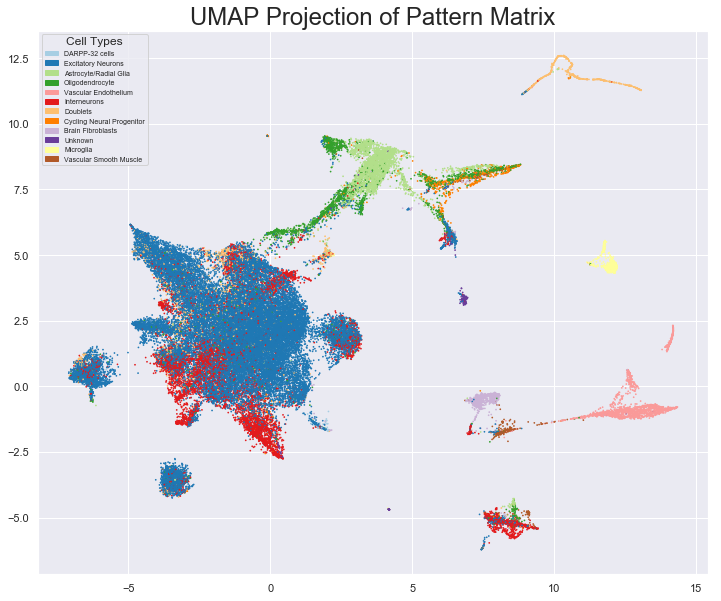

In [3]:
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.UMAP_Projection(dataset_filtered, 'CellType', 'ARG01', 'UMAPARG01', 20)

Number of nonzero cells 176


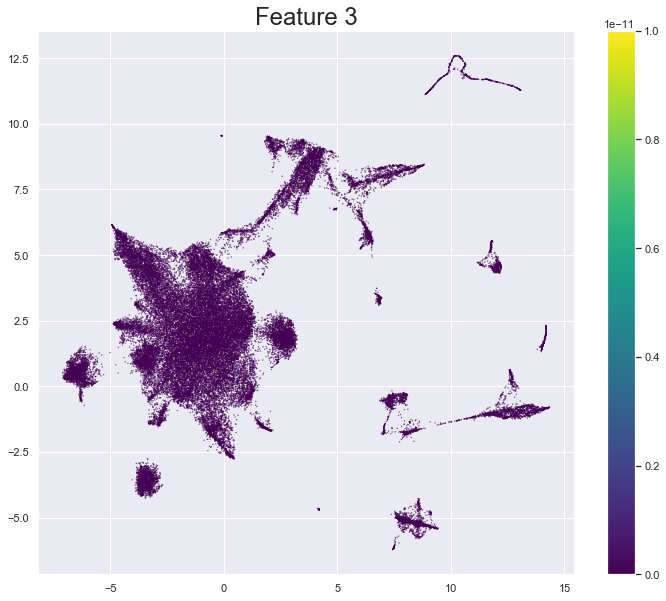

Number of nonzero cells 12891


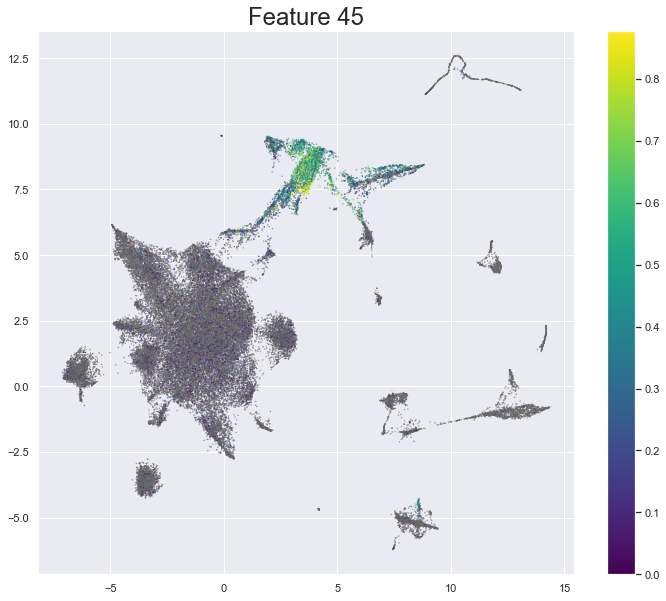

Number of nonzero cells 18732


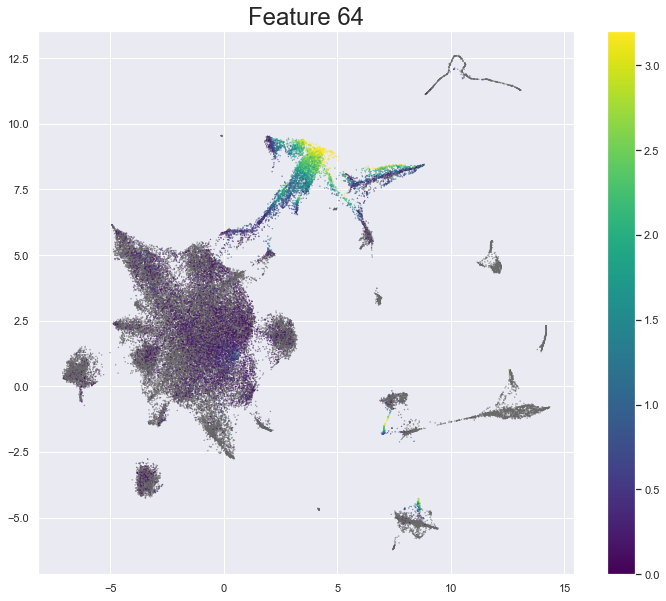

Number of nonzero cells 9532


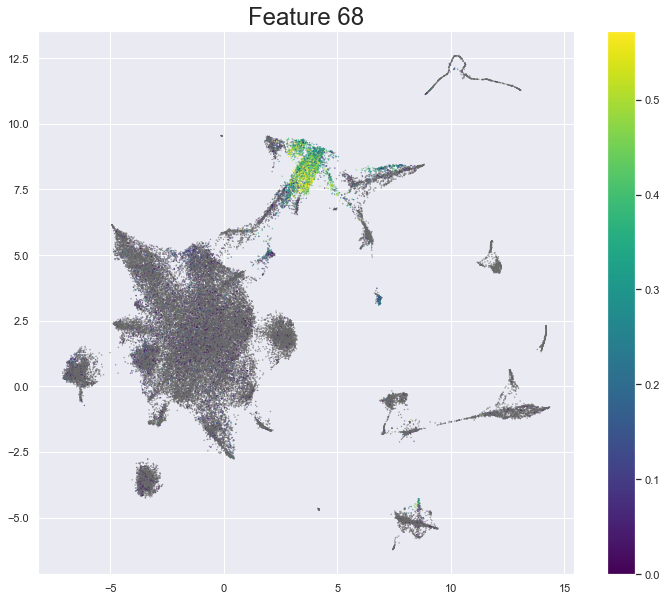

Number of nonzero cells 5243


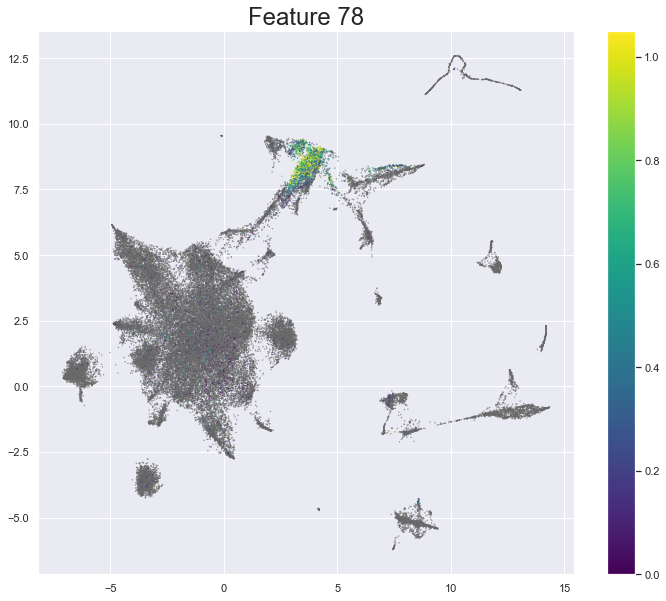

In [4]:
scProject.viz.featurePlots(dataset_filtered, [3, 45, 64, 68, 78], 'ARG01', 'UMAPARG01')

These features seem like very strong markers except for feature 78 as it also has the lowest pearson value. If we up the lasso we will be able to get a better sense of the strong features.

(55371, 80)
[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


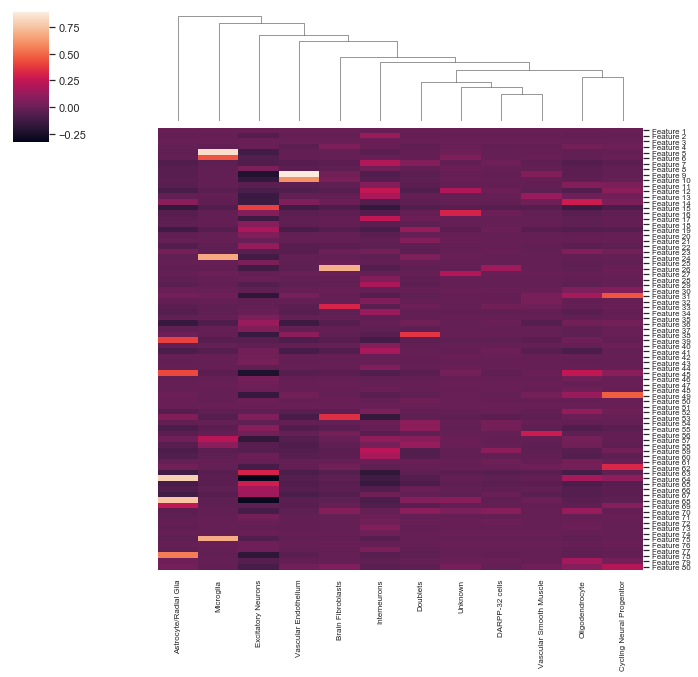

In [5]:
plt.rcParams['figure.figsize']= [10, 12]
scProject.rg.NNLR_ElasticNet(dataset_filtered, patterns_filtered, 'ARG99', .0001, .99)
scProject.viz.pearsonMatrix(dataset_filtered, patterns_filtered, 'CellType', 12, 'ARG99', 'PearsARG99', True, False)


[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


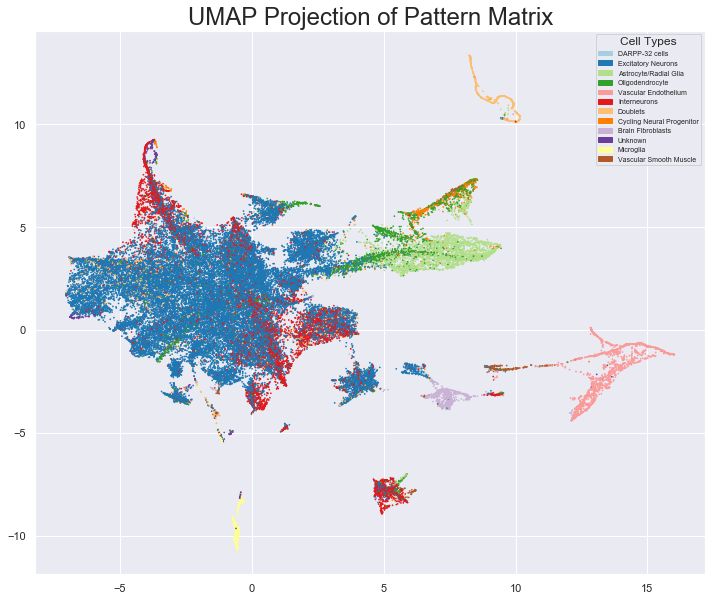

In [6]:
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.UMAP_Projection(dataset_filtered, 'CellType', 'ARG99', 'UMAPARG99', 20)

Number of nonzero cells 16


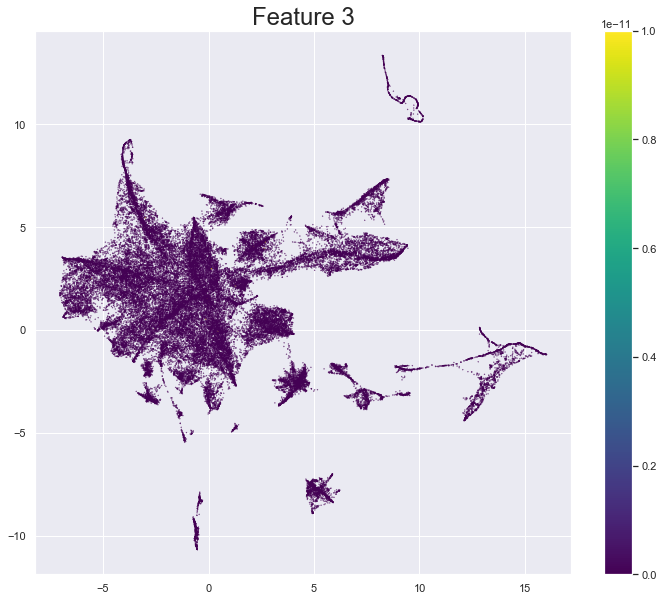

Number of nonzero cells 10284


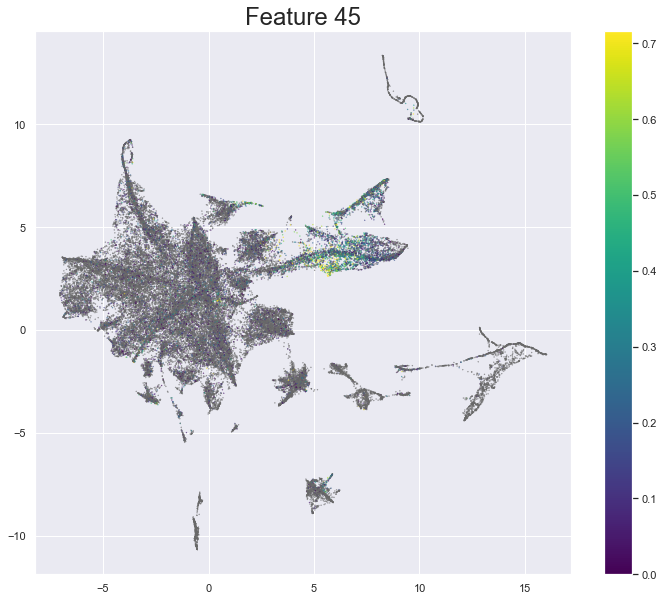

Number of nonzero cells 12110


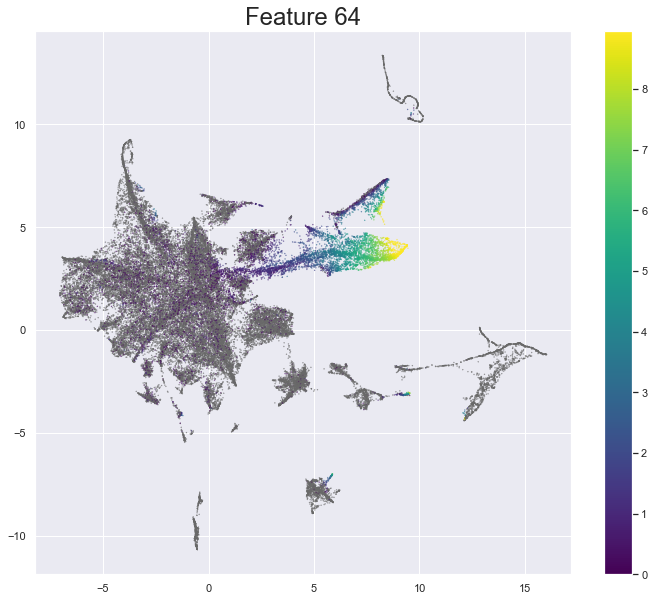

Number of nonzero cells 8834


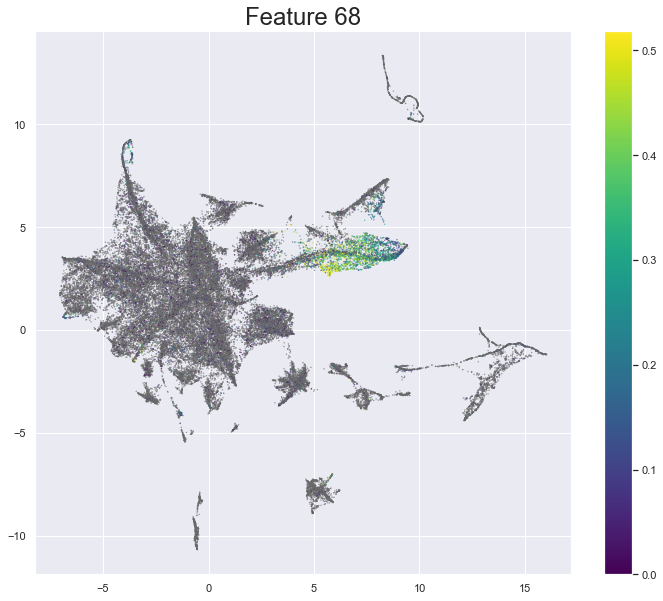

Number of nonzero cells 4206


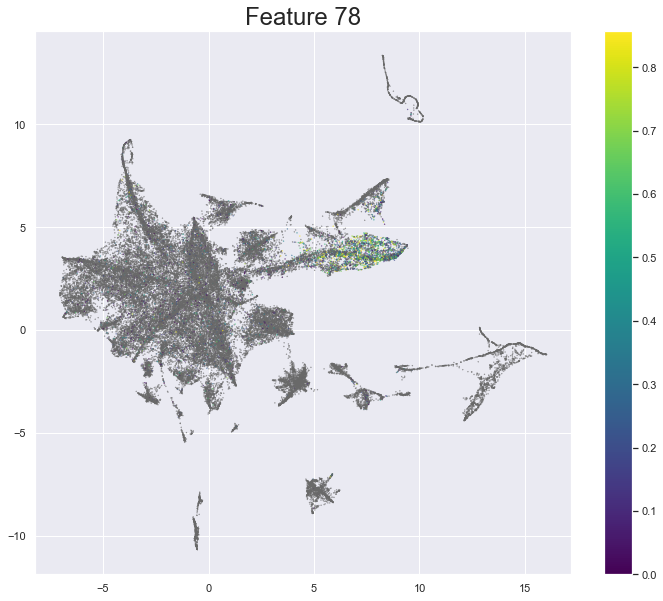

In [7]:
scProject.viz.featurePlots(dataset_filtered, [3, 45, 64, 68, 78], 'ARG99', 'UMAPARG99')

Features 3 and 78 clearly dropped out, which shows that while they may be expressed in astrocytes and radial glia they are not the core of the cell type as they are not as necessary in reconstructing the cell type as the other features that persisted. This is a perfect example of the model being forced to choose the most important features.

Lastly, lets up the regularization while keeping the lasso high to see what happens.

(55371, 80)
[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


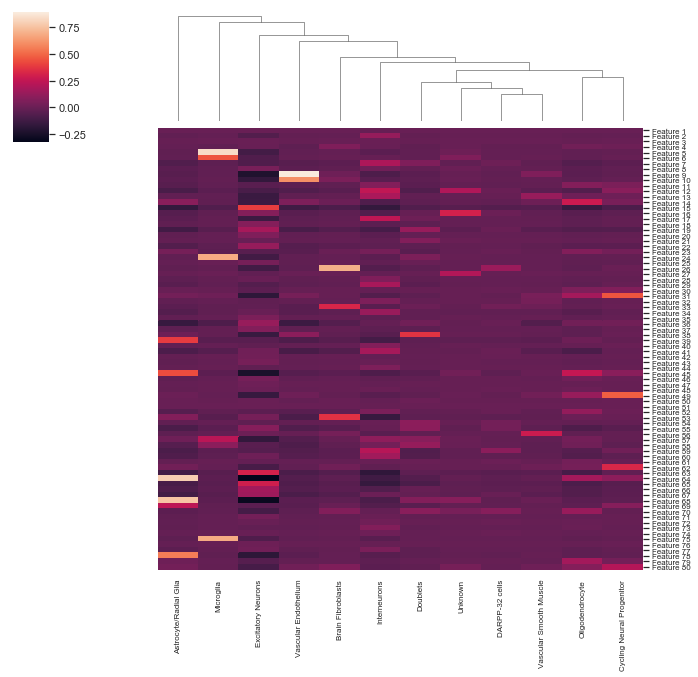

In [8]:
plt.rcParams['figure.figsize']= [10, 12]
scProject.rg.NNLR_ElasticNet(dataset_filtered, patterns_filtered, 'ARGHigh', .00025, .99)
scProject.viz.pearsonMatrix(dataset_filtered, patterns_filtered, 'CellType', 12, 'ARGHigh', 'PearsARGHigh', True, False)


[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


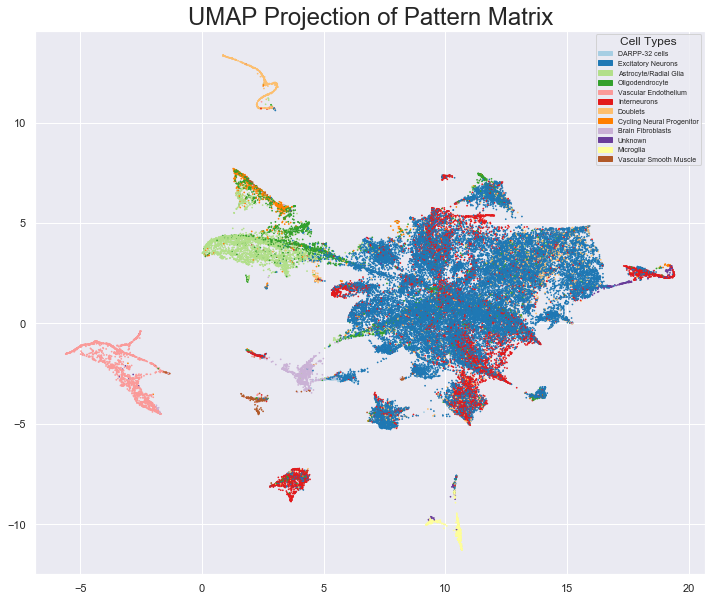

In [9]:
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.UMAP_Projection(dataset_filtered, 'CellType', 'ARGHigh', 'UMAPARGHigh', 20)

Number of nonzero cells 15


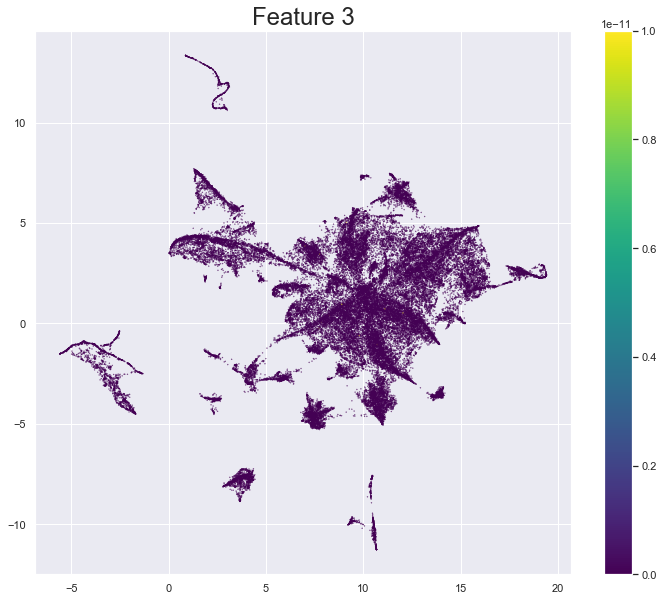

Number of nonzero cells 10403


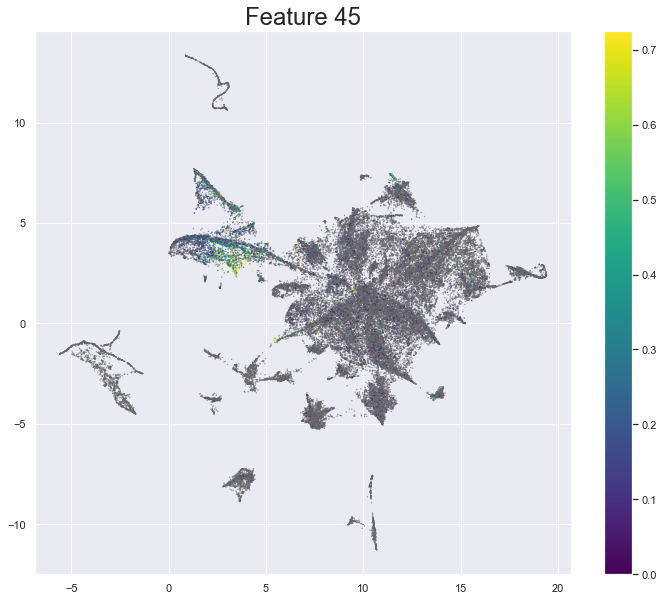

Number of nonzero cells 11060


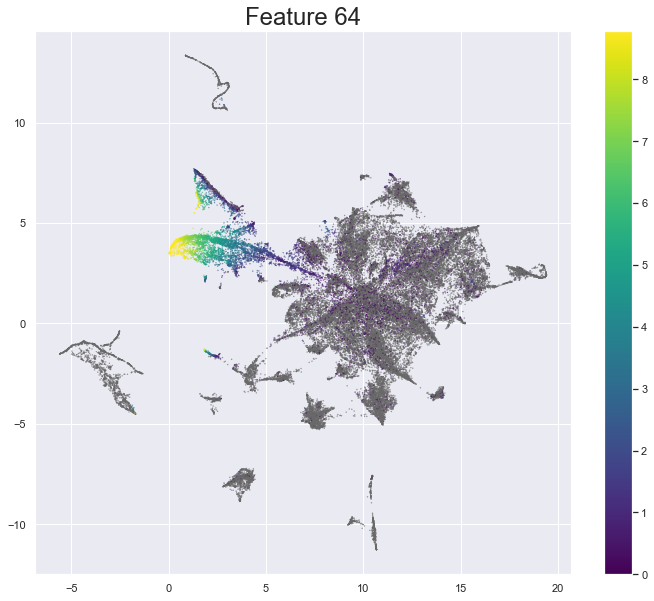

Number of nonzero cells 8773


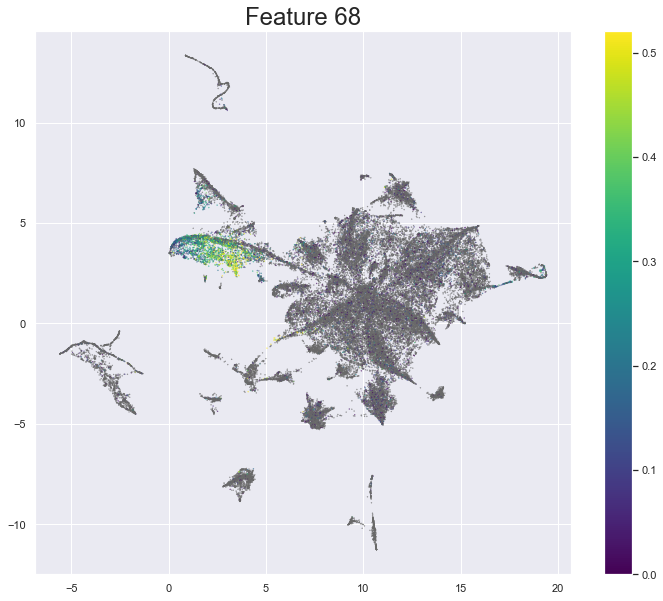

Number of nonzero cells 4215


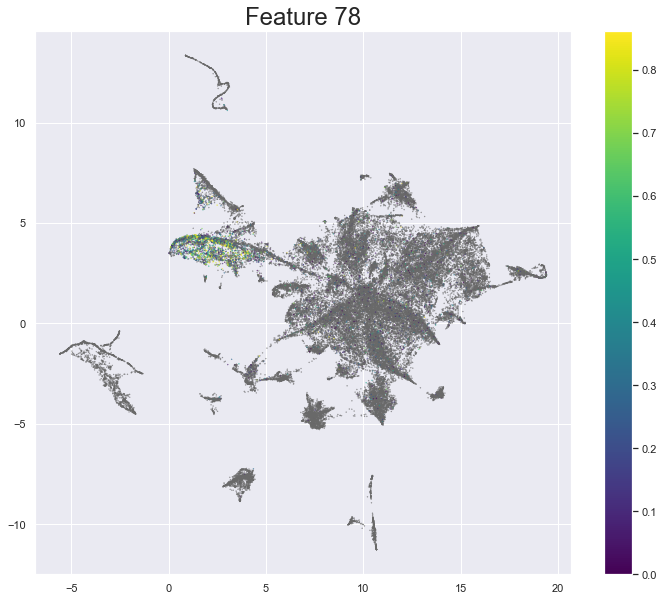

In [10]:
scProject.viz.featurePlots(dataset_filtered, [3, 45, 64, 68, 78], 'ARGHigh', 'UMAPARGHigh')

This clearly shows us that features 64 and 68 are the most robust markers of astrocytes/radial glia in the cortex. Lastly, let's check the highest expressed genes to understand the biology. Feature 45 plays a role so let's print those genes as well.

In [17]:
print(scProject.stats.importantGenes(patterns_filtered, 45, .1), "Feature 45 Genes")
print(scProject.stats.importantGenes(patterns_filtered, 64, .145), "Feature 64 Genes")
print(scProject.stats.importantGenes(patterns_filtered, 68, .3), "Feature 68 Genes")


[Index(['ENSMUSG00000026385', 'ENSMUSG00000027447', 'ENSMUSG00000092341'], dtype='object', name='index')] Feature 45 Genes
[Index(['ENSMUSG00000026385', 'ENSMUSG00000027447', 'ENSMUSG00000029838',
       'ENSMUSG00000000184', 'ENSMUSG00000000031'],
      dtype='object', name='index')] Feature 64 Genes
[Index(['ENSMUSG00000027447', 'ENSMUSG00000092341'], dtype='object', name='index')] Feature 68 Genes


These are ensemble ids so I just used https://www.syngoportal.org/convert.html to convert them to gene names.
#### Feature 45: 
ENSMUSG00000027447	cystatin C <br>
ENSMUSG00000026385	diazepam binding inhibitor <br>
ENSMUSG00000092341	metastasis associated lung adenocarcinoma transcript 1 (non-coding RNA) <br>
#### Feature 64:
ENSMUSG00000000184	cyclin D2<br>
ENSMUSG00000027447	cystatin C<br>
ENSMUSG00000026385	diazepam binding inhibitor<br>
ENSMUSG00000000031	H19, imprinted maternally expressed transcript<br>
ENSMUSG00000029838	pleiotrophin<br>
#### Feature 68:
ENSMUSG00000027447	cystatin C<br>
ENSMUSG00000092341	metastasis associated lung adenocarcinoma transcript 1 (non-coding RNA)<br>
It is worth noting that all three features have cystatin C which is known to be expressed in astrocytes. Also, Diazepam binding inhibitor is known to be expressed in astrocytes. These features make sense that they would be expressed in astrocytes. 
